In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tkinter import Tk, Label, Button, OptionMenu, StringVar, Frame
from tkinter.filedialog import askopenfilename
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

df = pd.DataFrame()


UI set up. it's quite rough but that's ok.

In [32]:


# Function to calculate line of best fit
def line_of_best_fit(x, y):
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    return polynomial

# Function to plot the data for Graph 1
def plot_data_graph1():
    if canvas1:
        canvas1.get_tk_widget().destroy()
    plot_data(canvas1, x_var1, y_var1, color_var1, frame1)

# Function to plot the data for Graph 2
def plot_data_graph2():
    if canvas2:
        canvas2.get_tk_widget().destroy()
    plot_data(canvas2, x_var2, y_var2, color_var2, frame2)

# Generic function to plot data
def plot_data(canvas, x_var, y_var, color_var, frame):
    x_col = x_var.get()
    y_col = y_var.get()
    color_col = color_var.get()
    
    if x_col and y_col and color_col:
        # Check for NaN values and drop them
        if df[[x_col, y_col, color_col]].isnull().any().any():
            print("Warning: NaN values found in data. Dropping rows with NaN values.")
            df.dropna(subset=[x_col, y_col, color_col], inplace=True)
        
        x = df[x_col]
        y = df[y_col]
        color_values = df[color_col]
        
        # Print unique values in the color column for debugging
        print(f"Unique values in {color_col}: {color_values.unique()}")
        
        # Map colors: Red for True/1, Blue for False/0
        colors = color_values.map({True: 'red', False: 'blue', 1: 'red', 0: 'blue'})
        
        # Create the plot
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.scatter(x, y, c=colors, label='Data Points')
        
        # Add line of best fit
        fit = line_of_best_fit(x, y)
        ax.plot(x, fit(x), color='green', label='Line of Best Fit')
        
        # Set plot limits to ensure all points are visible
        ax.set_xlim([x.min(), x.max()])
        ax.set_ylim([y.min(), y.max()])
        
        ax.set_xlabel(x_col)
        ax.set_ylabel(y_col)
        ax.set_title(f"Scatterplot: {x_col} vs {y_col}")
        ax.legend()
        
        # Render plot in the Tkinter window
        if canvas:
            canvas.get_tk_widget().destroy()
        canvas = FigureCanvasTkAgg(fig, master=frame)
        canvas.get_tk_widget().pack()
        canvas.draw()

# Function to load data
def load_data():
    global df
    #filepath = askopenfilename(filetypes=[("CSV Files", "*.csv"), ("Excel Files", "*.xlsx")])
    filepath = "Football/data/graph_nfl_data.csv"
    if filepath:
        try:
            df = pd.read_csv(filepath)
            print("File loaded successfully!")
            print(df.columns)  # Print columns to verify
        except Exception as e:
            print(f"Error loading file: {e}")
            return
    df['winner'] = df.apply(
    lambda row: row['home'] if row['win_home']==True else row['away'],
    axis=1
    )
    print('opening file!')
    
    allowed_cols = ['win_home', 'first_downs_away', 'first_downs_home', 'first_downs_from_passing_away',
       'first_downs_from_passing_home', 'first_downs_from_rushing_away',
       'first_downs_from_rushing_home', 'first_downs_from_penalty_away',
       'first_downs_from_penalty_home', 'third_down_comp_away',
       'third_down_att_away', 'third_down_comp_home', 'third_down_att_home',
       'fourth_down_comp_away', 'fourth_down_att_away',
       'fourth_down_comp_home', 'fourth_down_att_home', 'plays_away',
       'plays_home', 'drives_away', 'drives_home', 'yards_away', 'yards_home',
       'pass_comp_away', 'pass_att_away', 'pass_yards_away', 'pass_comp_home',
       'pass_att_home', 'pass_yards_home', 'sacks_num_away',
       'sacks_yards_away', 'sacks_num_home', 'sacks_yards_home',
       'rush_att_away', 'rush_yards_away', 'rush_att_home', 'rush_yards_home',
       'pen_num_away', 'pen_yards_away', 'pen_num_home', 'pen_yards_home',
       'redzone_comp_away', 'redzone_att_away', 'redzone_comp_home',
       'redzone_att_home', 'fumbles_away', 'fumbles_home',
       'interceptions_away', 'interceptions_home', 'def_st_td_away',
       'def_st_td_home', 'possession_away', 'possession_home', 'winner',
       'win_home', 'third_down_conv_rate_home', 'third_down_conv_rate_away',
       'redzone_conv_rate_home', 'redzone_conv_rate_away', 'turnovers_home',
       'turnovers_away', 'score_diff', 'yards_diff', 'pass_yards_diff',
       'rush_yards_diff', 'turnovers_diff', 'first_downs_diff',
       'third_down_conv_diff', 'redzone_conv_rate_diff', 'possession_diff',
       'yards_per_play_home', 'yards_per_play_away', 'interaction_1',
       'interaction_3', 'turnovers_per_drive_home', 'turnovers_per_drive_away',
       'interaction_2', 'yards_per_play_diff', 'turnovers_per_drive_diff']
    # Add 'home_win' column based on the 'winner' column
    # df['win_home'] = df['winner'] == df['home']
    # Update dropdown options
    update_dropdowns(df, x_var1, y_var1, color_var1, x_menu1, y_menu1, color_menu1,allowed_cols)
    update_dropdowns(df, x_var2, y_var2, color_var2, x_menu2, y_menu2, color_menu2, allowed_cols)

# Function to update dropdowns
def update_dropdowns(df, x_var, y_var, color_var, x_menu, y_menu, color_menu, allowed_columns):
    if allowed_columns is None:
        allowed_columns = list(df.columns)
    columns = allowed_columns
    x_var.set(columns[1])
    y_var.set(columns[2])
    color_var.set(columns[0])
    x_menu['menu'].delete(0, 'end')
    y_menu['menu'].delete(0, 'end')
    color_menu['menu'].delete(0, 'end')
    for col in columns:
        x_menu['menu'].add_command(label=col, command=lambda c=col: x_var.set(c))
        y_menu['menu'].add_command(label=col, command=lambda c=col: y_var.set(c))
        color_menu['menu'].add_command(label=col, command=lambda c=col: color_var.set(c))

# Initialize the main window
window = Tk()
window.title("Dual Scatterplot UI with Conditional Coloring")
window.geometry("1200x800")

# Initialize variables
df = pd.DataFrame()
canvas1 = None
canvas2 = None

# Graph 1
x_var1 = StringVar()
y_var1 = StringVar()
color_var1 = StringVar()
frame1 = Frame(window)
frame1.pack(side="left", padx=10, pady=10)

Label(frame1, text="Graph 1: X-Axis").pack()
x_menu1 = OptionMenu(frame1, x_var1, ())
x_menu1.pack()

Label(frame1, text="Graph 1: Y-Axis").pack()
y_menu1 = OptionMenu(frame1, y_var1, ())
y_menu1.pack()

Label(frame1, text="Graph 1: Color By").pack()
color_menu1 = OptionMenu(frame1, color_var1, ())
color_menu1.pack()

Button(frame1, text="Plot Graph 1", command=plot_data_graph1).pack()

# Graph 2
x_var2 = StringVar()
y_var2 = StringVar()
color_var2 = StringVar()
frame2 = Frame(window)
frame2.pack(side="right", padx=10, pady=10)

Label(frame2, text="Graph 2: X-Axis").pack()
x_menu2 = OptionMenu(frame2, x_var2, ())
x_menu2.pack()

Label(frame2, text="Graph 2: Y-Axis").pack()
y_menu2 = OptionMenu(frame2, y_var2, ())
y_menu2.pack()

Label(frame2, text="Graph 2: Color By").pack()
color_menu2 = OptionMenu(frame2, color_var2, ())
color_menu2.pack()

Button(frame2, text="Plot Graph 2", command=plot_data_graph2).pack()

# Load Data Button
Button(window, text="Load Data", command=load_data).pack()

# Start the Tkinter main loop
window.mainloop()


Win percentage graph

Current working directory: /Users/jcklvrgn/Documents/GitHub/NFL_predictor/src
getting file!


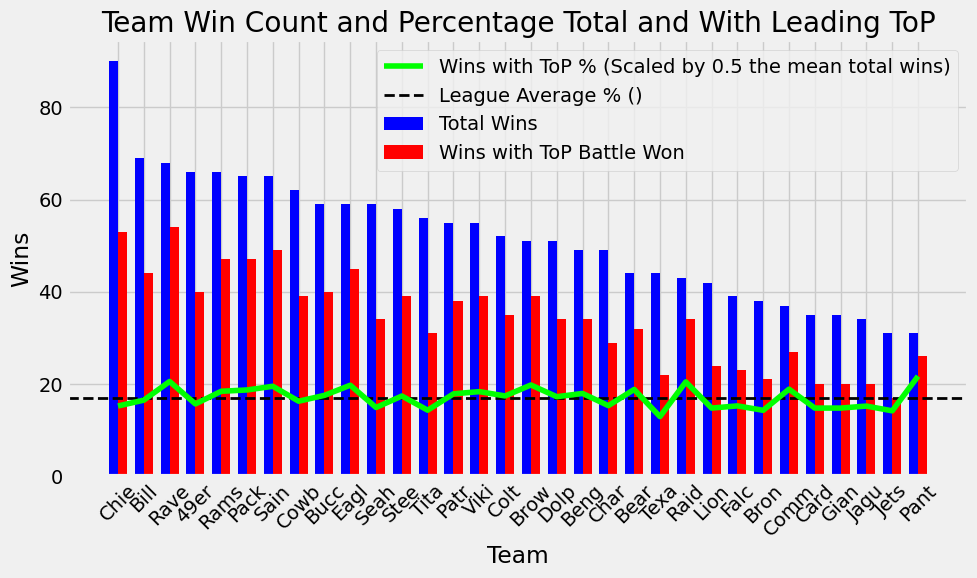

          team abbrev  total_wins  win_with_ToP  percent_W_ToP
18      Chiefs   Chie          90            53       0.588889
9        Bills   Bill          69            44       0.637681
17      Ravens   Rave          68            54       0.794118
27       49ers   49er          66            40       0.606061
23        Rams   Rams          66            47       0.712121
10     Packers   Pack          65            47       0.723077
16      Saints   Sain          65            49       0.753846
20     Cowboys   Cowb          62            39       0.629032
13  Buccaneers   Bucc          59            40       0.677966
29      Eagles   Eagl          59            45       0.762712
24    Seahawks   Seah          59            34       0.576271
28    Steelers   Stee          58            39       0.672414
4       Titans   Tita          56            31       0.553571
15    Patriots   Patr          55            38       0.690909
25     Vikings   Viki          55            39       0

In [3]:
import basics
import os
print("Current working directory:", os.getcwd())
df = basics.get_df()



ats, teams, abv = basics.get_team_stats(2018, 2023, df)

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35

# Create an array of positions for the bars
x_positions = np.arange(len(teams))

# Plot the 'total_wins' as the first layer of bars
ax.bar(x_positions - bar_width / 2, ats['total_wins'], bar_width, label='Total Wins', color='blue')

# Plot the 'win_with_ToP' as the second layer of bars, slightly offset
ax.bar(x_positions + bar_width / 2, ats['win_with_ToP'], bar_width, label='Wins with ToP Battle Won', color='red')
ax.set_xticks(x_positions)
ax.set_xticklabels(ats["abbrev"], rotation=45)
scatter_x = ats['abbrev']  # x-values (team abbreviations)
scatter_y = ats['percent_W_ToP'] * (ats['total_wins'].mean()/2)  # y-values (wins with ToP)
ax.plot(scatter_x, scatter_y, color='lime', label='Wins with ToP % (Scaled by 0.5 the mean total wins)', zorder=5)
ax.axhline(y=scatter_y.mean(), color='black', linestyle='--', linewidth=2, label=f'League Average % ()')

ax.set_xlabel('Team')
ax.set_ylabel('Wins')
ax.set_title('Team Win Count and Percentage Total and With Leading ToP')
ax.legend()
plt.xticks(rotation=45)  # Rotate team abbreviations for better readability
plt.tight_layout()
plt.show()
print(ats)